In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

C:\Users\amir\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio


In [3]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

3.8.0


In [13]:
init_notebook_mode(connected=True)

In [14]:
import cufflinks as cf

In [15]:
# For offline use
cf.go_offline()

In [5]:
movies_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\movies_data.csv')

genres_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\genres_data.csv')

directors_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\directors_data.csv')
writers_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\writers_data.csv')
producers_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\producers_data.csv')
actors_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\actors_data.csv')
cinematographers_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\cinematographers_data.csv')
editors_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\editors_data.csv')
composers_data = pd.read_csv('F:\\IMDb Data\\Kaggle Data\\main_data\\composers_data.csv')

In [48]:
kaggle_data = pd.read_csv('F:\\IMDb Data\\Kaggle350\\AllMoviesDetailsCleaned.csv', sep=';')

C:\Users\amir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
kaggle_dataset = kaggle_data[['imdb_id', 'budget', 'revenue']]

In [8]:
kaggle_dataset = kaggle_dataset[kaggle_dataset['budget'] != 0]
kaggle_dataset = kaggle_dataset[kaggle_dataset['revenue'] != 0]
kaggle_dataset = kaggle_dataset.set_index('imdb_id')

In [9]:
d = movies_data
d = movies_data[movies_data['startYear'] > 2000]
#d = d[d['numVotes'] > 10]
#d = d[d['numVotes'] < 100000]

In [19]:
data = d.set_index('tconst')
data = data.join(genres_data.set_index('tconst'), how='inner')

data = data.join(directors_data.set_index('tconst'), how='inner')
#data = data.join(writers_data.set_index('tconst'), how='inner')
#data = data.join(producers_data.set_index('tconst'), how='inner')
data = data.join(actors_data.set_index('tconst'), how='inner')
#data = data.join(cinematographers_data.set_index('tconst'), how='inner')
#data = data.join(editors_data.set_index('tconst'), how='inner')
#data = data.join(composers_data.set_index('tconst'), how='inner')

data = data.join(kaggle_dataset, how='inner')


In [22]:
data_new = data.set_index('startYear')
data_new = data_new.sort_index()

In [23]:
data_new.head()

,primaryTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,is_War,is_Short,is_Musical,is_Biography,...,is_Romance,is_Talk-Show,is_Thriller,is_Game-Show,average_number_of_directors_other_works,directors_rating,average_number_of_actors_other_works,actors_rating,budget,revenue
startYear,,,,,,,,,,,,,,,,,,,,,
2001,Glitter,0,104,"Drama,Music,Romance",2.2,20708.0,0,0,0,0,...,1,0,0,0,2.0,6.450000,4.666667,5.525926,22000000,5271666
2001,Metropolis,0,108,"Adventure,Animation,Drama",7.3,18918.0,0,0,0,0,...,0,0,0,0,8.0,6.612500,15.500000,6.632759,14500000,95789342
2001,Bridget Jones's Diary,0,97,"Comedy,Drama,Romance",6.7,204806.0,0,0,0,0,...,1,0,0,0,2.0,6.200000,28.500000,6.347016,25000000,281929795
2001,Wet Hot American Summer,0,97,"Comedy,Romance",6.7,49407.0,0,0,0,0,...,1,0,0,0,5.0,5.960000,12.500000,6.093981,5000000,295206
2001,American Outlaws,0,94,"Action,Western",6.0,13114.0,0,0,0,0,...,0,0,0,0,6.0,5.633333,17.750000,5.923718,35000000,13678913


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3056 entries, tt0118589 to tt6673840
Data columns (total 41 columns):
primaryTitle                               3056 non-null object
isAdult                                    3056 non-null int64
startYear                                  3056 non-null int64
runtimeMinutes                             3056 non-null int64
genres                                     3056 non-null object
averageRating                              3056 non-null float64
numVotes                                   3056 non-null float64
is_War                                     3056 non-null int64
is_Short                                   3056 non-null int64
is_Musical                                 3056 non-null int64
is_Biography                               3056 non-null int64
is_Sport                                   3056 non-null int64
is_Documentary                             3056 non-null int64
is_Reality-TV                              3056 non-null int

In [35]:
new = data_new.groupby('is_Action')[['revenue', 'budget']]

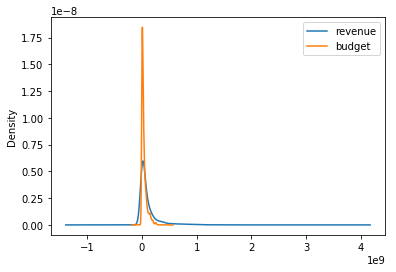

In [44]:
data_new[['revenue', 'budget']].plot(kind='')

In [51]:
kaggle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 22 columns):
id                             329044 non-null int64
budget                         329044 non-null int64
genres                         207515 non-null object
imdb_id                        250564 non-null object
original_language              328841 non-null object
original_title                 329043 non-null object
overview                       278060 non-null object
popularity                     329044 non-null object
production_companies           329044 non-null object
production_countries           329044 non-null object
release_date                   304998 non-null object
revenue                        329044 non-null int64
runtime                        292252 non-null float64
spoken_languages               324584 non-null object
status                         327056 non-null object
tagline                        52931 non-null object
title                       